note: all the result in the Drive

In [1]:
!pip install roboflow
!pip install ultralytics
from roboflow import Roboflow
rf = Roboflow(api_key="GojoMvCjgAWvG6j6hFe8")
project = rf.workspace("project-x2uaa").project("employee-performance-monitoring")
version = project.version(4)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [2]:
!pip install albumentations==1.4
!pip install ultralytics==8.2.50
!pip install roboflow


In [3]:
import torch
from ultralytics import YOLO
from PIL import Image
from roboflow import Roboflow
model = YOLO('yolov8n.pt')


You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


In [4]:

from roboflow import Roboflow
rf = Roboflow(api_key="EfACV3lp7ZlOJbQ0Cm5k")
project = rf.workspace("dmsoffice").project("worker-activity-detection")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [5]:

from roboflow import Roboflow
rf = Roboflow(api_key="EfACV3lp7ZlOJbQ0Cm5k")
project = rf.workspace("project-x2uaa").project("employee-performance-monitoring")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [6]:
import os
import shutil

def filter_labels_with_class(input_folder_labels, input_folder_images, output_folder_labels, output_folder_images, class_number):
    """
    Filter label files that have annotations for a specific class and copy the corresponding images and labels to new folders.

    Args:
    - input_folder_labels (str): Path to the folder containing label files.
    - input_folder_images (str): Path to the folder containing image files.
    - output_folder_labels (str): Path to the folder where filtered label files will be saved.
    - output_folder_images (str): Path to the folder where filtered image files will be saved.
    - class_number (int): The class number to filter for.
    """
    # Create the output folders if they don't exist
    os.makedirs(output_folder_labels, exist_ok=True)
    os.makedirs(output_folder_images, exist_ok=True)

    # Iterate over all label files in the input folder
    for filename in os.listdir(input_folder_labels):
        label_file = os.path.join(input_folder_labels, filename)
        image_file = os.path.join(input_folder_images, os.path.splitext(filename)[0] + '.jpg')

        # Read the label file and filter out lines that contain annotations for the specified class
        filtered_lines = []
        with open(label_file, 'r') as f:
            for line in f:
                label, *values = line.split()
                if int(label) == class_number:
                    filtered_lines.append(line)

        # If there are no annotations for the specified class, skip this file
        if not filtered_lines:
            continue

        # Write the filtered lines to the output label file
        output_label_file = os.path.join(output_folder_labels, filename)
        with open(output_label_file, 'w') as f:
            f.writelines(filtered_lines)

        # Copy the image file to the output folder
        output_image_file = os.path.join(output_folder_images, os.path.basename(image_file))
        shutil.copy(image_file, output_image_file)





In [7]:

# Define the folder configurations as a list of dictionaries
folder_configs = [
    {
        "input_folder_labels": '/content/Worker-Activity-Detection-2/train/labels',
        "input_folder_images": '/content/Worker-Activity-Detection-2/train/images',
        "output_folder_labels": '/content/working/Worker/train/labels',
        "output_folder_images": '/content/working/Worker/train/images',
    },
    {
        "input_folder_labels": '/content/Worker-Activity-Detection-2/valid/labels',
        "input_folder_images": '/content/Worker-Activity-Detection-2/valid/images',
        "output_folder_labels": '/content/working/Worker/valid/labels',
        "output_folder_images": '/content/working/Worker/valid/images',
    },
    {
        "input_folder_labels": '/content/Worker-Activity-Detection-2/test/labels',
        "input_folder_images": '/content/Worker-Activity-Detection-2/test/images',
        "output_folder_labels": '/content/working/Worker/test/labels',
        "output_folder_images": '/content/working/Worker/test/images',
    }
]

# Class numbers to filter
class_numbers = [0, 1, 4, 5, 6, 7]

# Loop through each folder configuration and apply the function for each class number
for config in folder_configs:
    for class_number in class_numbers:
        # Call the function with each class number
        filter_labels_with_class(
            config["input_folder_labels"],
            config["input_folder_images"],
            config["output_folder_labels"],
            config["output_folder_images"],
            class_number
        )


In [8]:
import os

def change_class_number_in_labels(labels_folder, old_class_number, new_class_number):
    """
    Change the class number in all label files within the specified folder.

    Args:
    - labels_folder (str): Path to the folder containing label files.
    - old_class_number (int): The class number to be replaced.
    - new_class_number (int): The new class number.
    """
    # Iterate over all label files in the folder
    for filename in os.listdir(labels_folder):
        label_file = os.path.join(labels_folder, filename)

        # Read the contents of the label file
        with open(label_file, 'r') as f:
            lines = f.readlines()

        # Replace the old class number with the new class number in each line
        modified_lines = []
        for line in lines:
            label, *values = line.split()
            if int(label) == old_class_number:
                line = f"{new_class_number} {' '.join(values)}\n"
            modified_lines.append(line)

        # Write the modified contents back to the label file
        with open(label_file, 'w') as f:
            f.writelines(modified_lines)



In [9]:
# List of label folders to process
label_folders = [
    '/content/working/Worker/train/labels',
    '/content/working/Worker/valid/labels',
    '/content/working/Worker/test/labels'
]

# Old and new class numbers
old_class_numbers = [4, 5, 6, 7]
new_class_numbers = [2, 3, 4, 5]

# Loop through each label folder
for labels_folder in label_folders:
    # Loop through each pair of old and new class numbers
    for old_class, new_class in zip(old_class_numbers, new_class_numbers):
        change_class_number_in_labels(labels_folder, old_class, new_class)

In [10]:
classes = {
    0: 'At-Desk-NotWorking',
    1: 'At-Desk-Working',
    2: 'Sleeping',
    3: 'Standing-NotWorking',
    4: 'Standing-Working',
    5: 'Walking',
}

In [11]:
classes = [
'At-Desk-NotWorking',
'At-Desk-Working',
'Sleeping',
'Standing-NotWorking',
'Standing-Working',
'Walking',
          ]

In [12]:
import yaml

data = {
    'names': classes,
    'nc': len(classes),  # Use the length of classes
    'train': [
        '/content/working/Worker/train/images',

        '/content/Employee-Performance-Monitoring-4/train/images',

    ],
    'val': [
        '/content/working/Worker/valid/images',
        '/content/Employee-Performance-Monitoring-4/valid/images',

    ]
}

# Write the data dictionary to a YAML file
with open('/content/Employee-Performance-Monitoring-4/data.yaml', 'w') as yaml_file:
    yaml.dump(data, yaml_file, default_flow_style=False)

In [13]:
import os
os.environ["WANDB_API_KEY"] = "80f989087c98dbd9f594bdcb65c26423f93f7267"

In [14]:
import gc

# Run garbage collection
gc.collect()


9

In [15]:
import torch

# Define a custom YOLO class that inherits from the original YOLO class
class CustomYOLO(YOLO):
    def __init__(self, *args, **kwargs):
        super(CustomYOLO, self).__init__(*args, **kwargs)

        self.additional_layer = torch.nn.Conv2d(
            in_channels=1024,  # Adjust according to the previous layer's output channels
            out_channels=512,   # Number of output channels you want
            kernel_size=3,      # Kernel size
            stride=1,           # Stride
            padding=1           # Padding
        )

        self.batch_norm = torch.nn.BatchNorm2d(512)
        self.additional_layer = torch.nn.Conv2d(
            in_channels=512,  # Adjust according to the previous layer's output channels
            out_channels=256,   # Number of output channels you want
            kernel_size=3,      # Kernel size
            stride=1,           # Stride
            padding=1           # Padding
        )

        self.batch_norm = torch.nn.BatchNorm2d(256)
        self.additional_layer = torch.nn.Conv2d(
            in_channels=256,  # Adjust according to the previous layer's output channels
            out_channels=128,   # Number of output channels you want
            kernel_size=3,      # Kernel size
            stride=1,           # Stride
            padding=1           # Padding
        )

        # Example: If you want to add a BatchNorm layer
        self.batch_norm = torch.nn.BatchNorm2d(128)
    def forward(self, x):
        # Pass through original layers
        x = super(CustomYOLO, self).forward(x)

        # Add new layers to the forward pass
        x = self.additional_layer(x)
        x = self.batch_norm(x)
        x = torch.relu(x)  # Applying an activation function

        return x

# Check if CUDA is available
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Load the modified model
model = CustomYOLO('yolov8n.pt').to(device)  # Load the pretrained model onto the device

# Train the model
yolo = model.train(
    data='/content/Employee-Performance-Monitoring-4/data.yaml',
    epochs=100,
    batch=32,
    imgsz=640,   # Update image size
    device=device,
    workers=0,   # Set workers to 0 for single-threaded data loading
    amp=False    # Disable Automatic Mixed Precision if needed
)


New https://pypi.org/project/ultralytics/8.3.39 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Employee-Performance-Monitoring-4/data.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=0, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, em

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: aj-showail (aj-showail-university-of-jeddah). Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'


`torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
train: Scanning /content/Employee-Performance-Monitoring-4/train/labels.cache... 2999 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2999/2999 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Employee-Performance-Monitoring-4/valid/labels.cache... 209 images, 0 backgrounds, 0 corrupt: 100%|██████████| 209/209 [00:00<?, ?it/s]

Plotting labels to runs/detect/train2/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      7.27G      1.848      2.922      1.583        148        640: 100%|██████████| 94/94 [01:25<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


                   all        209        988      0.448      0.461      0.375      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      7.46G       1.72      2.004      1.475        147        640: 100%|██████████| 94/94 [01:23<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.97it/s]


                   all        209        988      0.557      0.477      0.431      0.228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      7.23G      1.693      1.769      1.454        112        640: 100%|██████████| 94/94 [01:23<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]

                   all        209        988      0.372      0.494      0.423      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      7.46G      1.662      1.607      1.437        107        640: 100%|██████████| 94/94 [01:23<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]

                   all        209        988       0.46       0.43      0.344      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      7.41G       1.63      1.488      1.417        156        640: 100%|██████████| 94/94 [01:23<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]

                   all        209        988      0.571      0.537       0.56       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      7.46G      1.597      1.386      1.396        126        640: 100%|██████████| 94/94 [01:23<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]

                   all        209        988      0.486       0.63      0.511      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      7.54G       1.56      1.323      1.378        117        640: 100%|██████████| 94/94 [01:24<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        209        988      0.432       0.55      0.546      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      7.26G      1.551      1.276      1.382        125        640: 100%|██████████| 94/94 [01:24<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]

                   all        209        988      0.534      0.604      0.588      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.54G       1.51      1.221      1.346        125        640: 100%|██████████| 94/94 [01:23<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]

                   all        209        988      0.689      0.551      0.601       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      7.17G      1.503      1.167      1.344        162        640: 100%|██████████| 94/94 [01:23<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]

                   all        209        988      0.803       0.56      0.653      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       7.4G      1.488      1.132      1.342        125        640: 100%|██████████| 94/94 [01:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        209        988       0.69       0.64       0.67      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      7.24G      1.459      1.087      1.319        170        640: 100%|██████████| 94/94 [01:23<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        209        988      0.747        0.6      0.685      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      7.17G      1.459      1.077      1.322        134        640: 100%|██████████| 94/94 [01:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]

                   all        209        988      0.743      0.671      0.706      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      7.54G      1.428      1.051      1.313        133        640: 100%|██████████| 94/94 [01:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]

                   all        209        988      0.694      0.596      0.677      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      7.25G      1.419      1.035      1.298        132        640: 100%|██████████| 94/94 [01:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.14it/s]

                   all        209        988      0.619      0.722      0.684      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      7.26G      1.414       1.02      1.293        126        640: 100%|██████████| 94/94 [01:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]

                   all        209        988      0.615      0.694      0.695      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      7.43G      1.403       1.01       1.29        125        640: 100%|██████████| 94/94 [01:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]

                   all        209        988       0.67      0.709      0.705      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      7.25G      1.384     0.9875      1.281        116        640: 100%|██████████| 94/94 [01:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.14it/s]

                   all        209        988      0.686      0.754       0.73      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      7.54G      1.373     0.9685      1.275        131        640: 100%|██████████| 94/94 [01:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.06it/s]

                   all        209        988      0.744      0.667      0.705      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      7.22G      1.374     0.9588      1.277        192        640: 100%|██████████| 94/94 [01:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]

                   all        209        988      0.756      0.668      0.674      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      7.25G      1.344      0.929      1.255        118        640: 100%|██████████| 94/94 [01:24<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        209        988      0.757      0.724      0.761       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      7.25G      1.335     0.9224       1.25        131        640: 100%|██████████| 94/94 [01:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.07it/s]

                   all        209        988      0.711      0.659      0.694      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       7.4G      1.339     0.9191      1.252        133        640: 100%|██████████| 94/94 [01:24<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all        209        988      0.749      0.673      0.746      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      7.45G      1.314     0.9101      1.253         87        640: 100%|██████████| 94/94 [01:23<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]

                   all        209        988      0.651      0.734      0.722      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      7.45G      1.318     0.8909       1.24        144        640: 100%|██████████| 94/94 [01:24<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.07it/s]

                   all        209        988      0.743      0.725       0.76      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      7.22G      1.305     0.8864      1.237        162        640: 100%|██████████| 94/94 [01:23<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]

                   all        209        988      0.748      0.757      0.783      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       7.4G      1.301     0.8811      1.232        147        640: 100%|██████████| 94/94 [01:23<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]

                   all        209        988       0.78      0.719      0.755      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      7.26G      1.279     0.8685      1.216        169        640: 100%|██████████| 94/94 [01:23<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]

                   all        209        988      0.726      0.735      0.753       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       7.4G      1.278     0.8444      1.222        132        640: 100%|██████████| 94/94 [01:24<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.06it/s]

                   all        209        988      0.686      0.744      0.759      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.24G      1.271     0.8405      1.213        120        640: 100%|██████████| 94/94 [01:24<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.15it/s]

                   all        209        988      0.685      0.771      0.759      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      7.22G      1.262     0.8411      1.216        116        640: 100%|██████████| 94/94 [01:23<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all        209        988      0.732      0.744       0.77      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      7.45G      1.261     0.8264      1.209        123        640: 100%|██████████| 94/94 [01:24<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.16it/s]

                   all        209        988      0.794      0.708      0.768      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      7.26G      1.251     0.8229      1.208        125        640: 100%|██████████| 94/94 [01:23<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]

                   all        209        988       0.76      0.756      0.785      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      7.24G      1.249     0.8219      1.201        132        640: 100%|██████████| 94/94 [01:23<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all        209        988      0.754      0.745      0.779      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      7.23G       1.24     0.8099      1.201        107        640: 100%|██████████| 94/94 [01:22<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

                   all        209        988      0.794      0.738      0.787      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      7.45G      1.228     0.8074      1.199        118        640: 100%|██████████| 94/94 [01:23<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

                   all        209        988      0.772      0.705      0.749      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      7.46G      1.231     0.7981      1.197        134        640: 100%|██████████| 94/94 [01:23<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.06it/s]

                   all        209        988      0.765      0.683      0.773      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      7.26G      1.218     0.7983      1.189        111        640: 100%|██████████| 94/94 [01:23<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]

                   all        209        988      0.745       0.75      0.774      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      7.17G      1.213      0.785      1.184        125        640: 100%|██████████| 94/94 [01:23<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all        209        988      0.723      0.791      0.795      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      7.17G      1.204     0.7781      1.181        120        640: 100%|██████████| 94/94 [01:23<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]

                   all        209        988       0.77      0.786      0.785      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      7.23G      1.199     0.7719      1.179        119        640: 100%|██████████| 94/94 [01:23<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]

                   all        209        988       0.81      0.755      0.791      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      7.46G      1.187     0.7646      1.172        121        640: 100%|██████████| 94/94 [01:23<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.16it/s]

                   all        209        988      0.793       0.76      0.814      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      7.45G       1.19     0.7653      1.177        163        640: 100%|██████████| 94/94 [01:23<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]

                   all        209        988      0.801      0.711      0.778      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      7.54G      1.186     0.7546      1.175         83        640: 100%|██████████| 94/94 [01:25<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]

                   all        209        988      0.761      0.798      0.818       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      7.24G      1.183     0.7544      1.171         97        640: 100%|██████████| 94/94 [01:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]

                   all        209        988      0.782      0.773      0.816      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      7.25G      1.159     0.7428      1.162        104        640: 100%|██████████| 94/94 [01:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.06it/s]

                   all        209        988      0.775      0.734      0.804      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      7.44G      1.153     0.7372      1.157        113        640: 100%|██████████| 94/94 [01:25<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]

                   all        209        988      0.743      0.781      0.802      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      7.23G      1.154     0.7315      1.152        109        640: 100%|██████████| 94/94 [01:25<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.16it/s]

                   all        209        988      0.782      0.759      0.797      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      7.45G      1.135     0.7237      1.147        143        640: 100%|██████████| 94/94 [01:23<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]

                   all        209        988      0.787      0.778      0.818      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      7.23G      1.144     0.7335      1.152        167        640: 100%|██████████| 94/94 [01:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        209        988      0.779       0.72      0.822      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      7.46G      1.139     0.7253      1.153        156        640: 100%|██████████| 94/94 [01:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.16it/s]

                   all        209        988      0.759      0.769      0.802      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      7.44G      1.126     0.7119      1.148         91        640: 100%|██████████| 94/94 [01:23<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all        209        988      0.782      0.784      0.809      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      7.17G      1.135     0.7242      1.152        160        640: 100%|██████████| 94/94 [01:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]

                   all        209        988       0.79      0.782      0.798      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      7.46G      1.125     0.7081      1.145        129        640: 100%|██████████| 94/94 [01:23<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]

                   all        209        988      0.797      0.755      0.803      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      7.23G      1.123     0.7101      1.147        106        640: 100%|██████████| 94/94 [01:23<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all        209        988       0.79      0.758      0.804      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100       7.4G      1.109      0.701      1.134        156        640: 100%|██████████| 94/94 [01:23<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all        209        988      0.772      0.757      0.818      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      7.46G      1.116     0.6942      1.133        108        640: 100%|██████████| 94/94 [01:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        209        988      0.768      0.779      0.794      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      7.26G      1.105     0.6962       1.13        166        640: 100%|██████████| 94/94 [01:25<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        209        988      0.769      0.789      0.805      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      7.17G        1.1     0.6899       1.13        131        640: 100%|██████████| 94/94 [01:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]

                   all        209        988      0.777      0.804       0.82      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      7.23G      1.089     0.6854      1.124        117        640: 100%|██████████| 94/94 [01:25<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        209        988      0.775      0.834      0.824      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      7.17G      1.086     0.6742      1.122        125        640: 100%|██████████| 94/94 [01:24<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all        209        988      0.811      0.774      0.838      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      7.24G      1.086     0.6868      1.125        136        640: 100%|██████████| 94/94 [01:23<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]

                   all        209        988      0.778      0.795      0.825      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      7.24G      1.078     0.6751      1.117        156        640: 100%|██████████| 94/94 [01:23<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]

                   all        209        988      0.783      0.797       0.81      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      7.22G      1.058     0.6669      1.111        109        640: 100%|██████████| 94/94 [01:23<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        209        988      0.784      0.781      0.816      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100       7.4G      1.065     0.6608      1.112        128        640: 100%|██████████| 94/94 [01:24<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]

                   all        209        988      0.764      0.776      0.799      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      7.54G      1.059     0.6636      1.116        126        640: 100%|██████████| 94/94 [01:22<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]

                   all        209        988      0.783      0.807      0.825      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      7.45G      1.052     0.6531      1.106        152        640: 100%|██████████| 94/94 [01:22<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]

                   all        209        988      0.809      0.758      0.816       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      7.26G      1.062      0.662      1.113        131        640: 100%|██████████| 94/94 [01:23<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]

                   all        209        988      0.785      0.758      0.817      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      7.24G      1.049     0.6535      1.108        140        640: 100%|██████████| 94/94 [01:23<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all        209        988      0.794      0.783      0.818      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      7.45G      1.046     0.6524      1.103        127        640: 100%|██████████| 94/94 [01:23<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]

                   all        209        988      0.819      0.746      0.813      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      7.22G      1.035     0.6402      1.099        130        640: 100%|██████████| 94/94 [01:23<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.16it/s]

                   all        209        988      0.805      0.798      0.851      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      7.23G      1.027      0.641      1.096        145        640: 100%|██████████| 94/94 [01:23<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        209        988      0.766      0.823      0.838      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      7.45G      1.026     0.6329      1.097         98        640: 100%|██████████| 94/94 [01:23<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]

                   all        209        988      0.795      0.793      0.813      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100       7.4G      1.033     0.6361        1.1        109        640: 100%|██████████| 94/94 [01:23<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]

                   all        209        988      0.776      0.785      0.818      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      7.27G      1.025     0.6286      1.093        125        640: 100%|██████████| 94/94 [01:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all        209        988       0.78      0.809      0.849      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      7.23G      1.007     0.6257      1.087         82        640: 100%|██████████| 94/94 [01:23<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]

                   all        209        988      0.814      0.803      0.839      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      7.45G      1.014      0.629      1.086        182        640: 100%|██████████| 94/94 [01:24<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]

                   all        209        988      0.816      0.798      0.835      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100       7.4G      1.002     0.6271      1.083        137        640: 100%|██████████| 94/94 [01:24<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]

                   all        209        988      0.823      0.781      0.837      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      7.45G      1.003     0.6194      1.084        146        640: 100%|██████████| 94/94 [01:25<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]

                   all        209        988      0.777      0.808      0.834      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       7.4G     0.9951     0.6191      1.081        107        640: 100%|██████████| 94/94 [01:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.14it/s]

                   all        209        988      0.814       0.81      0.853      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      7.22G     0.9932     0.6075      1.079         93        640: 100%|██████████| 94/94 [01:26<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]

                   all        209        988      0.761      0.823      0.839      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      7.22G     0.9912     0.6138      1.079        147        640: 100%|██████████| 94/94 [01:26<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all        209        988      0.775      0.791       0.82      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      7.41G     0.9892     0.6071      1.074        148        640: 100%|██████████| 94/94 [01:25<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.07it/s]

                   all        209        988      0.777      0.825      0.839       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      7.23G      0.966     0.5913      1.068        106        640: 100%|██████████| 94/94 [01:25<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  2.00it/s]

                   all        209        988      0.792      0.805      0.854      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      7.25G     0.9914      0.608       1.08        128        640: 100%|██████████| 94/94 [01:25<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.07it/s]

                   all        209        988      0.792      0.807      0.839      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      7.23G     0.9614     0.5973      1.066        114        640: 100%|██████████| 94/94 [01:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.07it/s]

                   all        209        988      0.826      0.814      0.847      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      7.43G      0.962     0.5934      1.068        187        640: 100%|██████████| 94/94 [01:25<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]

                   all        209        988      0.779      0.818      0.842       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      7.46G     0.9617     0.5843      1.066        149        640: 100%|██████████| 94/94 [01:25<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        209        988      0.787      0.797      0.847      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      7.22G     0.9522     0.5901      1.064         76        640: 100%|██████████| 94/94 [01:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.07it/s]

                   all        209        988      0.818      0.772      0.841      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      7.52G     0.9545     0.5947      1.064        102        640: 100%|██████████| 94/94 [01:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

                   all        209        988      0.794      0.798      0.843      0.561


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      7.44G     0.8954     0.5088      1.055         97        640: 100%|██████████| 94/94 [01:21<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.06it/s]

                   all        209        988      0.755      0.827      0.841      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      7.44G     0.8681     0.4927      1.044        101        640: 100%|██████████| 94/94 [01:21<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all        209        988      0.809      0.776      0.829      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      7.44G     0.8645     0.4873      1.039         83        640: 100%|██████████| 94/94 [01:19<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]

                   all        209        988      0.805      0.781      0.827      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       7.4G     0.8589     0.4895      1.036        107        640: 100%|██████████| 94/94 [01:20<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.14it/s]

                   all        209        988      0.805      0.761      0.826      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100       7.4G      0.852      0.485      1.034         72        640: 100%|██████████| 94/94 [01:20<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all        209        988      0.795      0.774       0.82      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      7.44G     0.8497     0.4771       1.03         73        640: 100%|██████████| 94/94 [01:20<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]

                   all        209        988      0.779      0.784      0.823      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      7.44G     0.8405     0.4757      1.024        109        640: 100%|██████████| 94/94 [01:20<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.07it/s]

                   all        209        988       0.82      0.755      0.834      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      7.43G     0.8378     0.4723      1.027        108        640: 100%|██████████| 94/94 [01:20<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.15it/s]

                   all        209        988      0.827      0.747      0.828      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      7.44G     0.8321     0.4693      1.024         84        640: 100%|██████████| 94/94 [01:21<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]

                   all        209        988       0.82      0.754      0.828      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      7.43G     0.8277     0.4712      1.024         52        640: 100%|██████████| 94/94 [01:20<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]

                   all        209        988       0.83      0.752      0.826      0.551



100 epochs completed in 2.404 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.40it/s]


                   all        209        988      0.815       0.81      0.853      0.574
    At-Desk-NotWorking         25         44      0.681      0.568       0.64      0.427
       At-Desk-Working        137        732      0.856      0.955      0.953      0.637
              Sleeping         15         15      0.921          1      0.991      0.689
   Standing-NotWorking         74        115      0.764      0.774       0.81      0.496
      Standing-Working         32         44      0.773      0.773      0.837      0.579
               Walking         38         38      0.893      0.789      0.887      0.614
Speed: 0.3ms preprocess, 4.5ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train2


lr/pg0,▃████▇▇▇▇▇▆▆▆▆▆▆▆▆▅▅▅▅▄▄▄▄▄▄▄▃▃▃▃▂▂▂▁▁▁▁
lr/pg1,▃████▇▇▇▇▇▆▆▆▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▁▁▁▁▁
lr/pg2,▆████▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▄▃▃▃▂▂▂▂▁▁▁▁▁
metrics/mAP50(B),▁▂▃▄▅▆▆▆▇▇▇▇▆▇▇▇▇▇▇▇▇▇██▇██▇██▇█████████
metrics/mAP50-95(B),▁▁▃▂▅▄▅▆▅▆▆▆▇▆▇▇▇▇▇▇▇▇▇▇█▇█▇████████████
metrics/precision(B),▁▃▁▃▂▇▆▄▄▆▆▅▇▇▇▇▆▇▇▇▇▇▇▇█▇▇▇▇▇██▇▇▇█▇▇██
metrics/recall(B),▁▃▄▂▅▄▄▆▅▆▆▆▆▇▆▇▇▆▅▇▆▇▇▇▆█▇▇██████▇▇▇▇▆█
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▇▇▆▆▆▅▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁


In [16]:
import gc

# Run garbage collection
gc.collect()


9

In [17]:
# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps  # a list contains map50-95 of each category

Ultralytics YOLOv8.2.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Employee-Performance-Monitoring-4/valid/labels.cache... 209 images, 0 backgrounds, 0 corrupt: 100%|██████████| 209/209 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]


                   all        209        988      0.814       0.81      0.853      0.573
    At-Desk-NotWorking         25         44      0.681      0.568       0.64      0.428
       At-Desk-Working        137        732      0.854      0.954      0.952      0.637
              Sleeping         15         15      0.922          1      0.991      0.689
   Standing-NotWorking         74        115      0.764      0.774       0.81      0.492
      Standing-Working         32         44      0.772      0.773      0.837      0.579
               Walking         38         38       0.89      0.789      0.887      0.611
Speed: 0.2ms preprocess, 4.0ms inference, 0.2ms loss, 6.3ms postprocess per image
Results saved to runs/detect/train22


array([    0.42799,     0.63675,     0.68905,     0.49173,     0.57881,     0.61123])

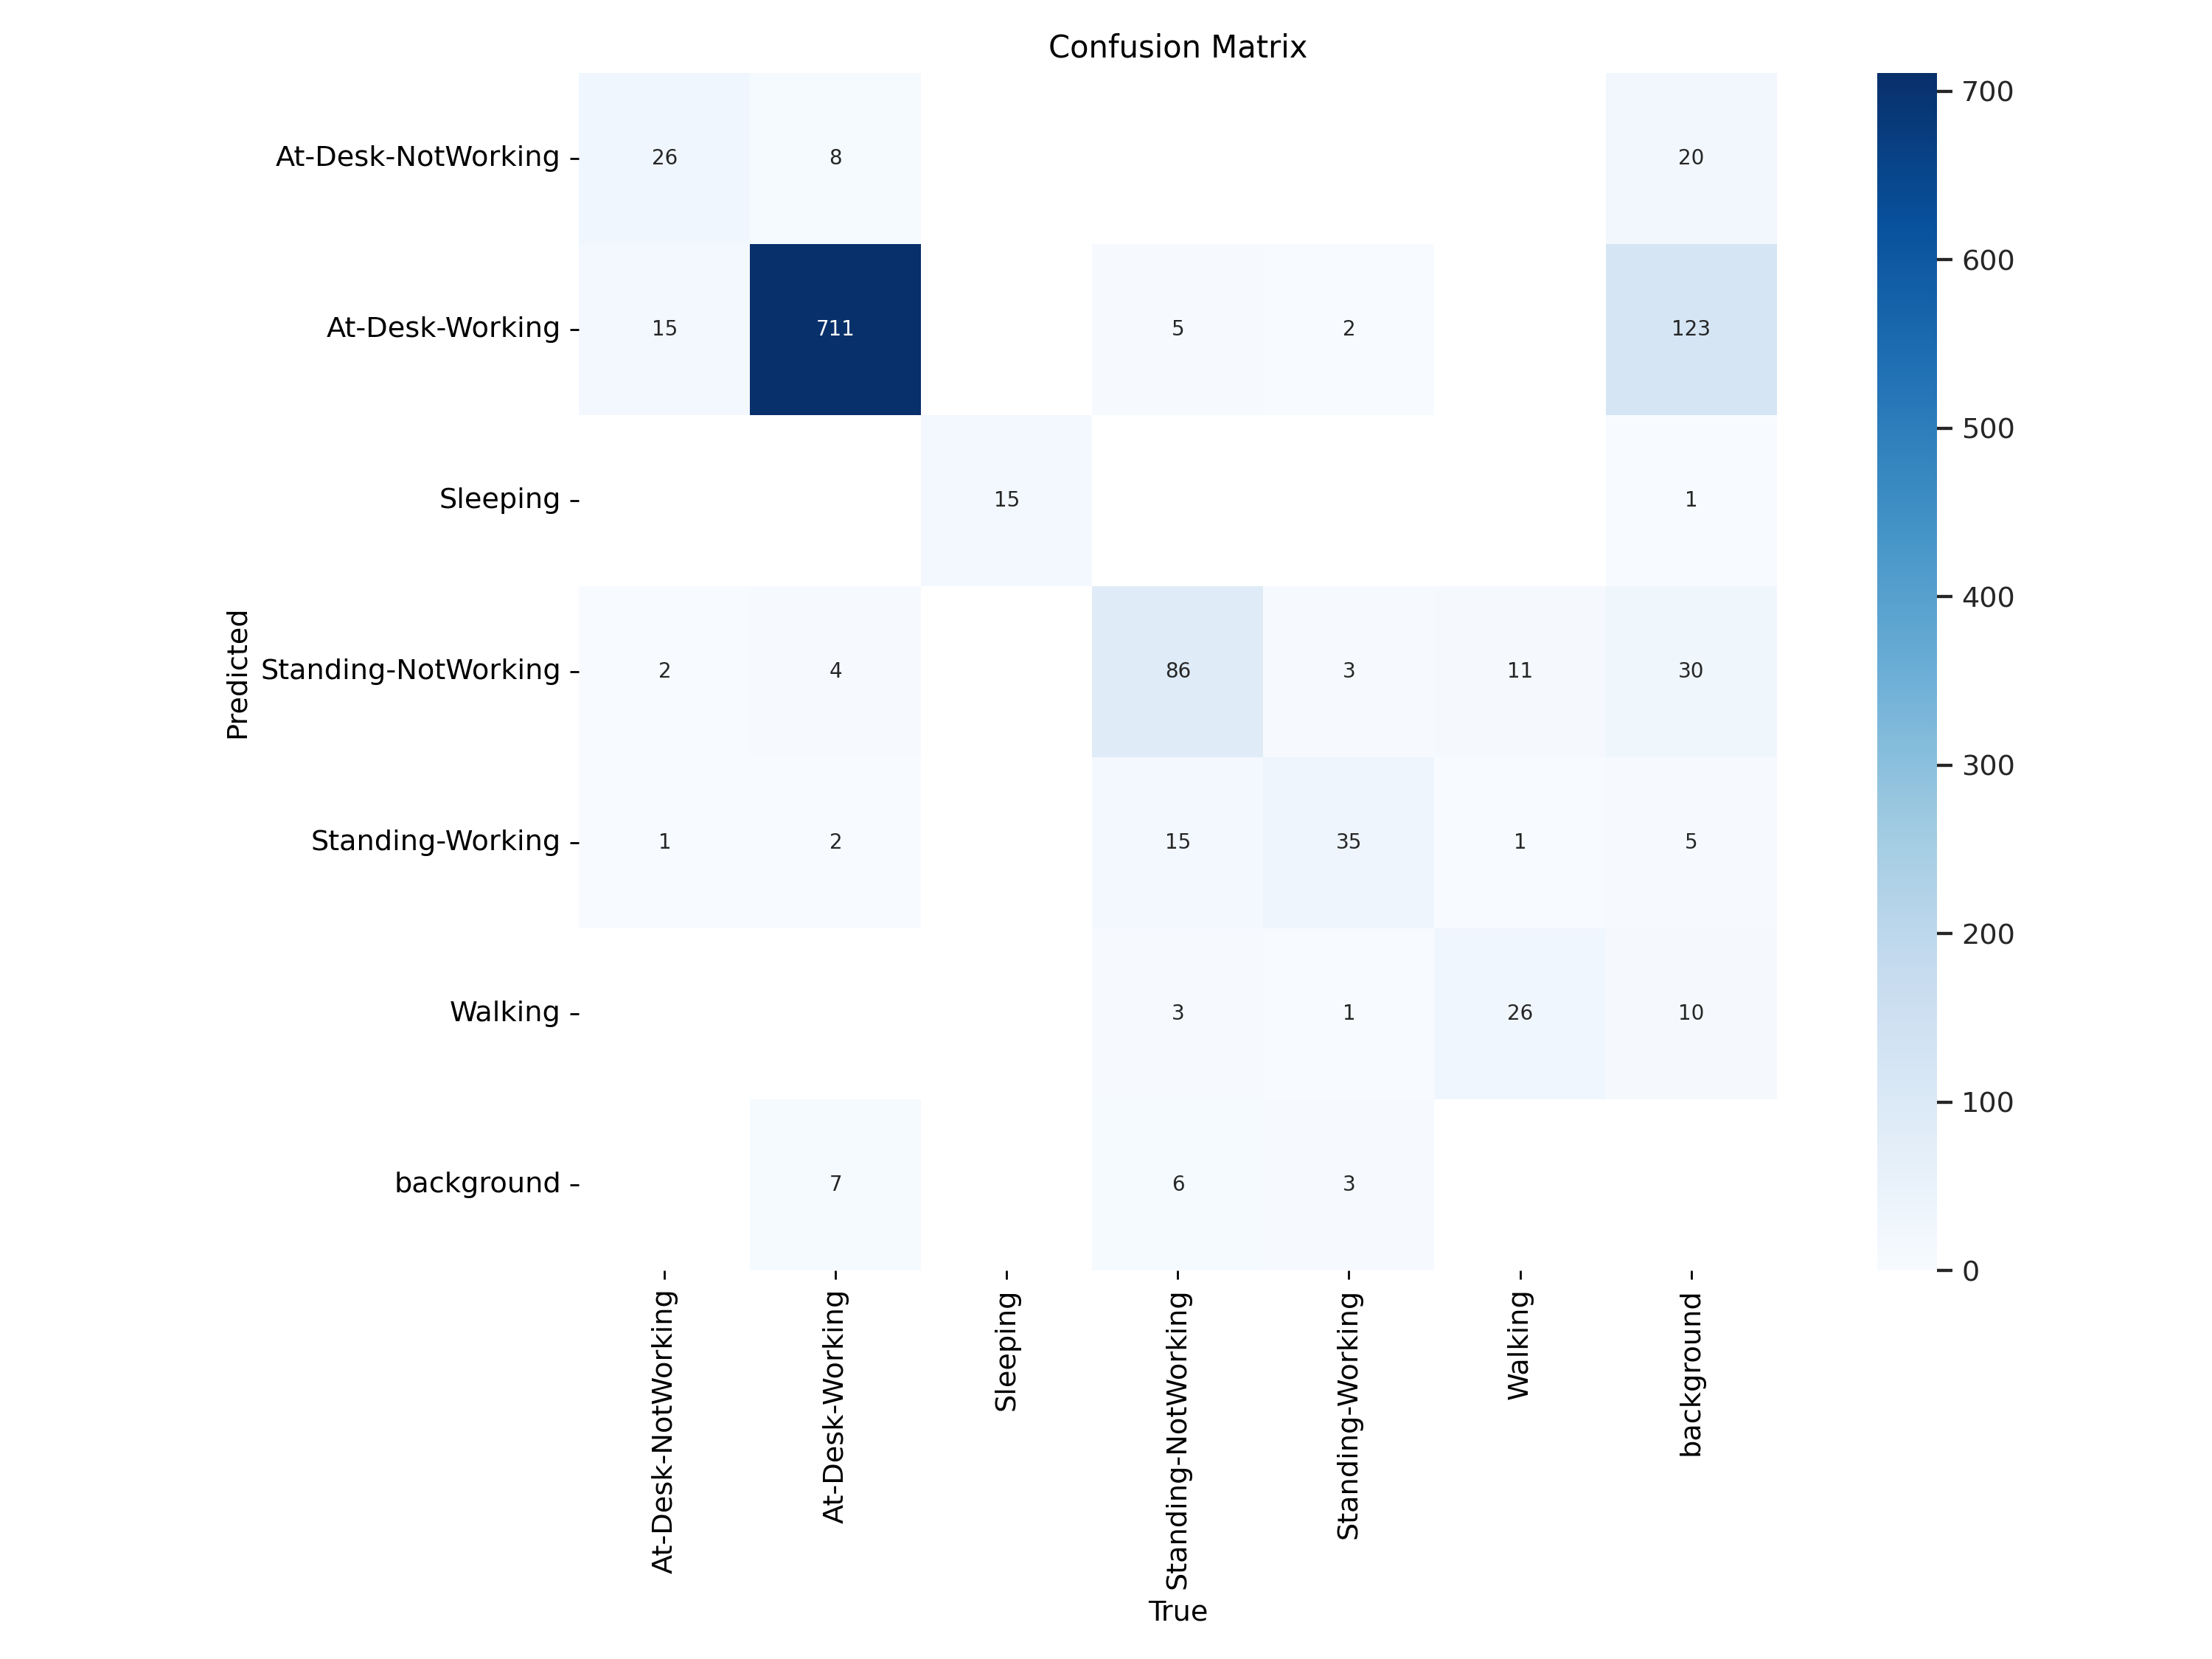

In [18]:
from PIL import Image
Image.open("/content/runs/detect/train2/confusion_matrix.png")

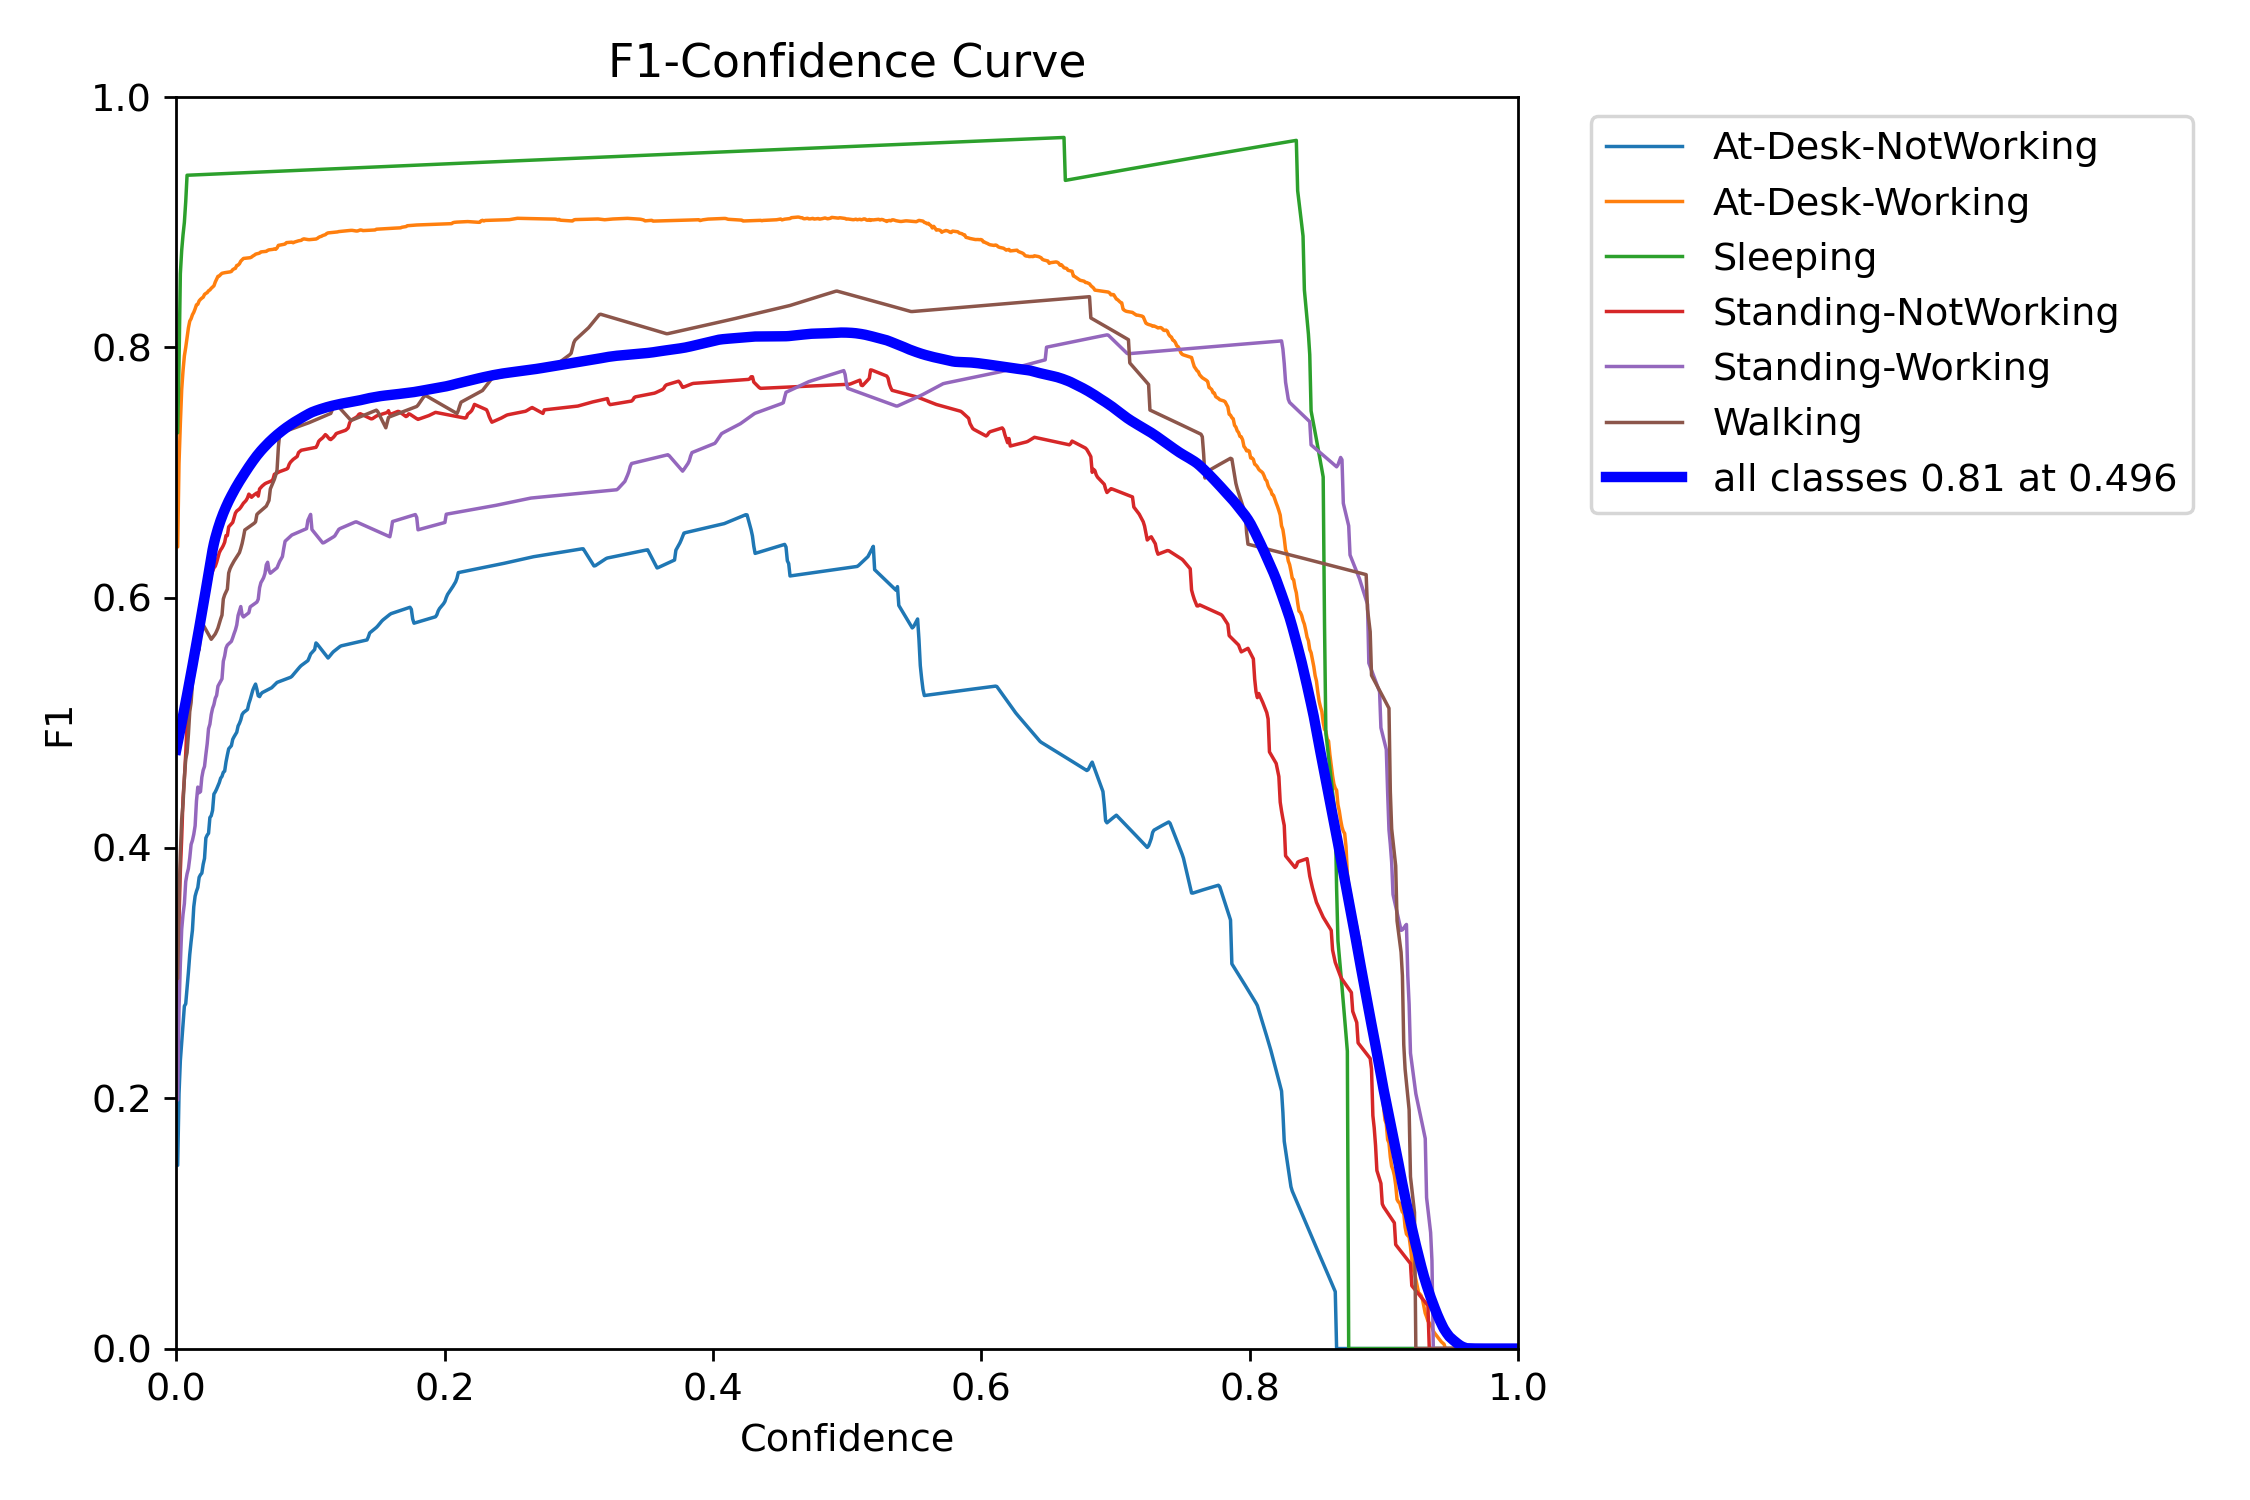

In [19]:
Image.open("/content/runs/detect/train2/F1_curve.png")

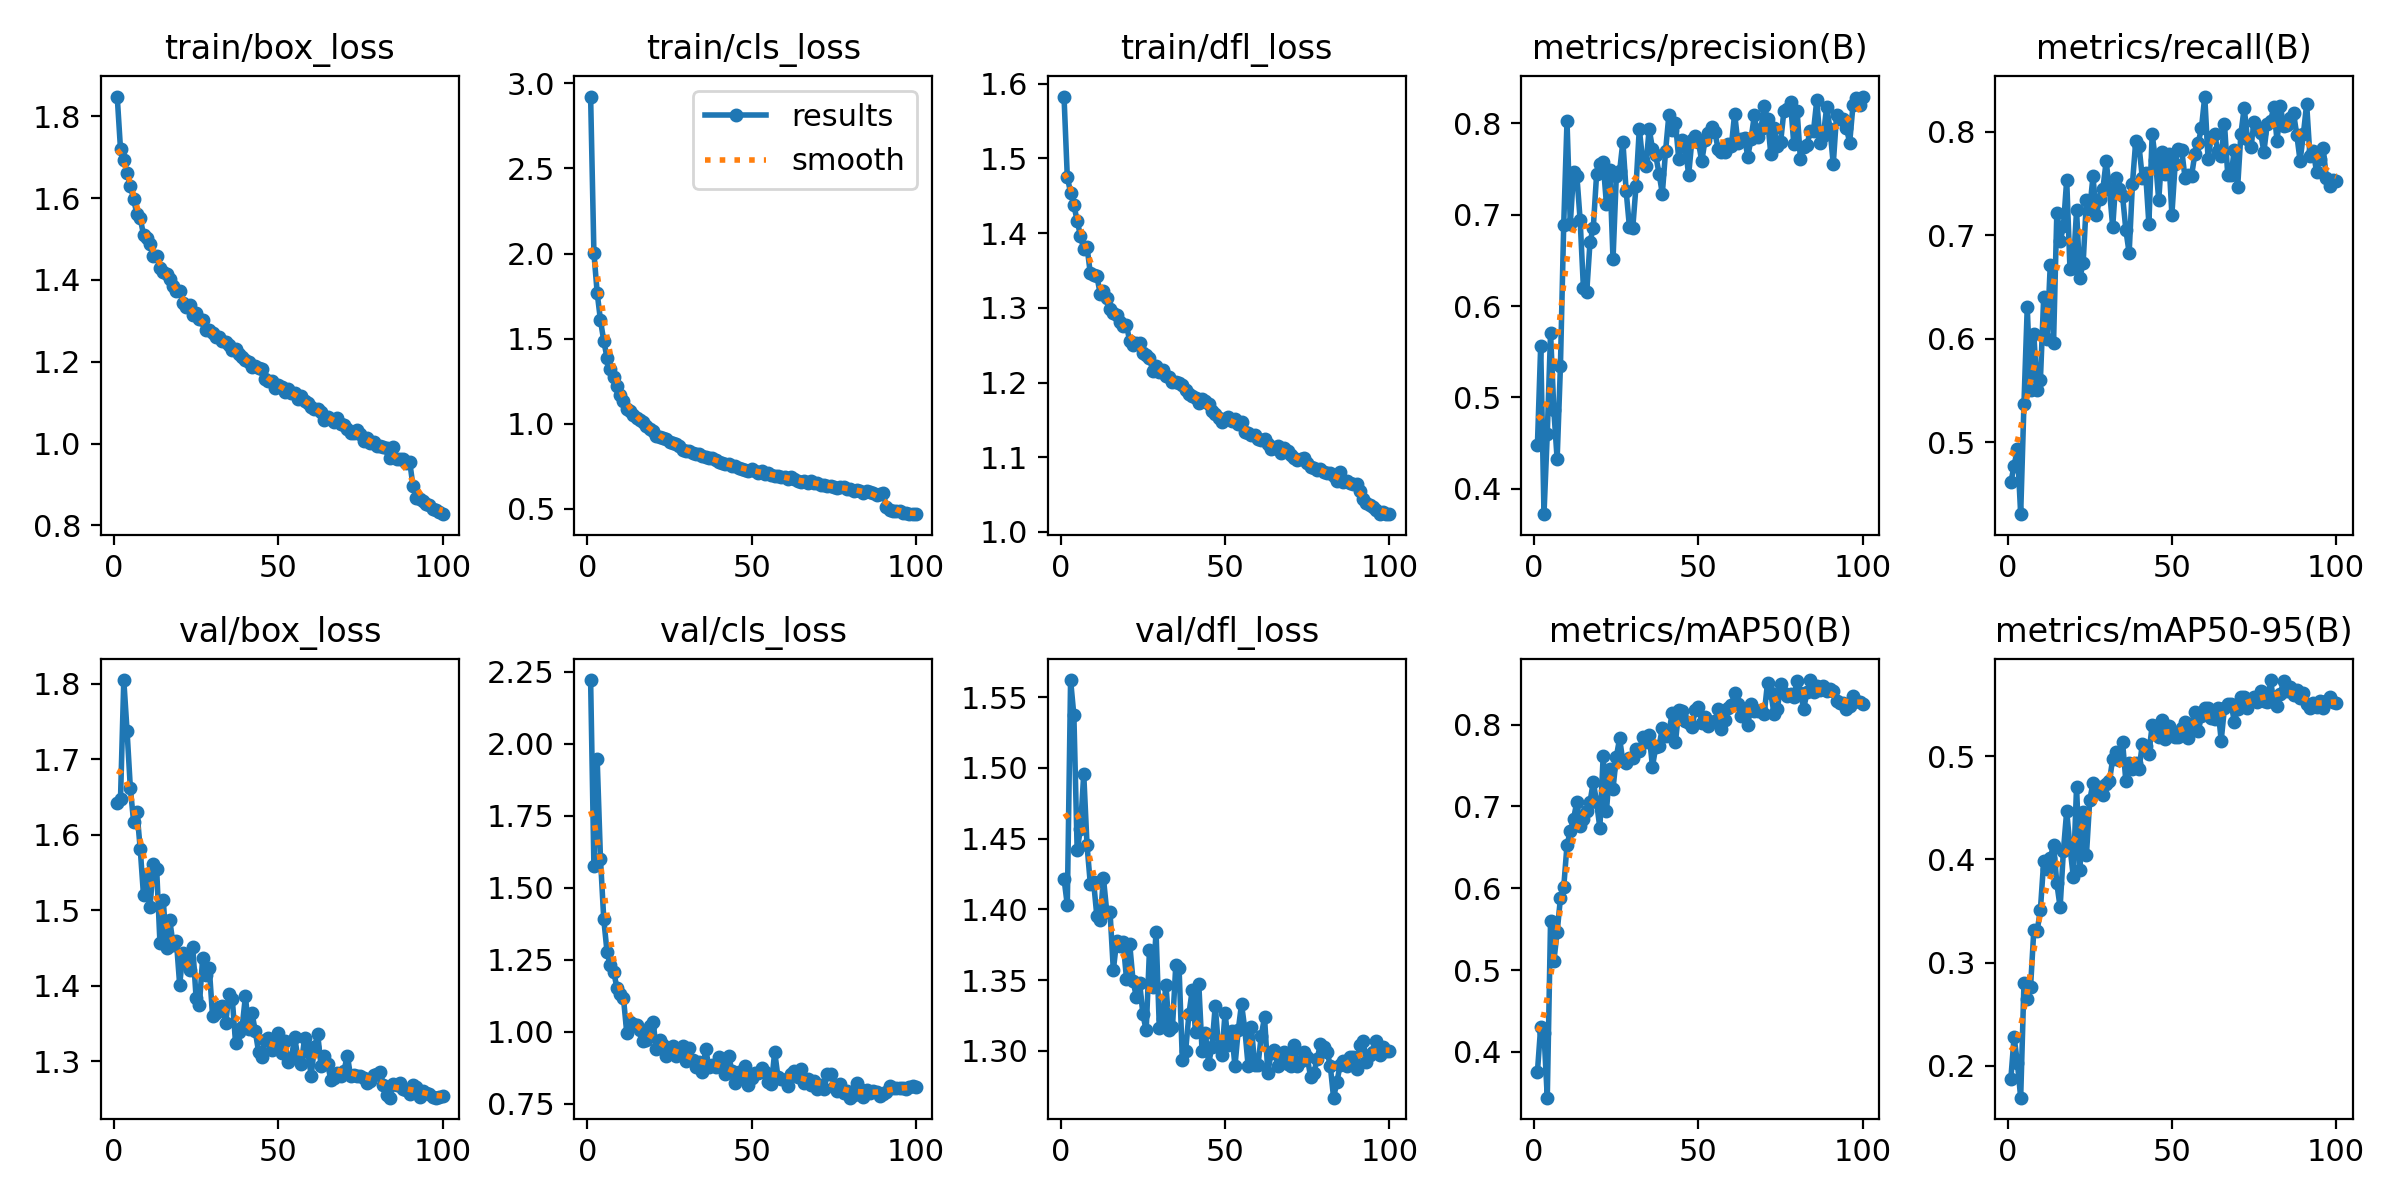

In [32]:
Image.open("/content/runs/detect/train2/results.png")

In [20]:
# Evaluate the model on the validation set
metricss = model.val(data='/content/Employee-Performance-Monitoring-4/data.yaml',device=device, verbose=False,imgsz=640,plots=True)
metricss

Ultralytics YOLOv8.2.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Employee-Performance-Monitoring-4/valid/labels.cache... 209 images, 0 backgrounds, 0 corrupt: 100%|██████████| 209/209 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


                   all        209        988      0.814       0.81      0.853      0.573
Speed: 0.2ms preprocess, 4.0ms inference, 0.1ms loss, 6.1ms postprocess per image
Results saved to runs/detect/train23


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a31c472c250>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [21]:
metricss.confusion_matrix.matrix

array([[         27,           7,           0,           0,           0,           0,          20],
       [         14,         712,           0,           5,           2,           0,         123],
       [          0,           0,          15,           0,           0,           0,           1],
       [          2,           4,           0,          86,           3,          11,          30],
       [          1,           2,           0,          15,          35,           1,           5],
       [          0,           0,           0,           3,           1,          26,          10],
       [          0,           7,           0,           6,           3,           0,           0]])

In [29]:
import pandas as pd

df=pd.read_csv("/content/runs/detect/train2/results.csv")
df

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,1.84810,2.92210,1.5827,0.44763,0.46096,0.37549,0.18709,1.6413,2.22170,1.4218,0.000330,0.000330,0.000330
1,2,1.71970,2.00390,1.4750,0.55664,0.47706,0.43104,0.22775,1.6472,1.57580,1.4030,0.000657,0.000657,0.000657
2,3,1.69260,1.76870,1.4542,0.37204,0.49358,0.42304,0.20276,1.8048,1.94570,1.5621,0.000977,0.000977,0.000977
3,4,1.66200,1.60700,1.4374,0.46024,0.43030,0.34414,0.16905,1.7369,1.60010,1.5372,0.000970,0.000970,0.000970
4,5,1.63040,1.48770,1.4165,0.57093,0.53716,0.56032,0.27988,1.6614,1.39120,1.4417,0.000960,0.000960,0.000960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0.84973,0.47708,1.0300,0.77916,0.78434,0.82268,0.54635,1.2567,0.80369,1.3068,0.000060,0.000060,0.000060
96,97,0.84047,0.47570,1.0238,0.81980,0.75541,0.83432,0.55318,1.2522,0.80042,1.2973,0.000050,0.000050,0.000050
97,98,0.83781,0.47226,1.0267,0.82743,0.74721,0.82848,0.55740,1.2518,0.80685,1.3026,0.000040,0.000040,0.000040
98,99,0.83206,0.46930,1.0242,0.82012,0.75367,0.82800,0.55267,1.2530,0.80982,1.3001,0.000030,0.000030,0.000030


In [30]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import pandas as pd

# Assuming `metrics.confusion_matrix.matrix` is the confusion matrix and `classes` is the list of class names
cm = np.array(metricss.confusion_matrix.matrix)
class_names_without_bg = classes  # Adjust to exclude "Background" if needed

# Calculate support (number of true instances for each class)
support = cm.sum(axis=1).astype(int)  # Ensure support is an integer array

# Prepare true labels (y_true) based on the confusion matrix
# Each index represents a class, repeat each class index by its corresponding support value
y_true = np.concatenate([np.full(support[i], i) for i in range(len(support)) if support[i] > 0])

# Prepare predicted labels (y_pred) based on the confusion matrix
# Each predicted class will be created based on how many times it was predicted
y_pred = np.concatenate([np.full(cm[i, j].astype(int), j) for i in range(len(support)) for j in range(len(support)) if cm[i, j] > 0])

# Calculate precision, recall, F1-score for each class
precision, recall, f1, _ = precision_recall_fscore_support(
    y_true, y_pred, labels=np.arange(len(class_names_without_bg)), average=None
)

# Calculate overall accuracy
accuracy = accuracy_score(y_true, y_pred)

# Create a detection report dictionary
detection_report = {}
for i, class_name in enumerate(class_names_without_bg):
    detection_report[class_name] = {
        "Precision": precision[i],
        "Recall": recall[i],
        "F1 Score": f1[i],
        "Support": int(support[i])  # Ensure support is represented as an integer
    }

# Add overall accuracy to the report
detection_report["Overall Accuracy"] = accuracy

# Print detection report in a readable format
print("Detection Report:")
for label, metrics in detection_report.items():
    if label == "Overall Accuracy":
        print(f"{label}: {metrics:.2f}")
    else:
        print(f"Class '{label}':")
        for metric_name, metric_value in metrics.items():
            print(f"  {metric_name}: {metric_value:.2f}")

# Optional: create a DataFrame for a detailed display
report_df = pd.DataFrame(detection_report).T
print("\nDetailed Detection Report:")
print(report_df)


Detection Report:
Class 'At-Desk-NotWorking':
  Precision: 0.61
  Recall: 0.50
  F1 Score: 0.55
  Support: 54.00
Class 'At-Desk-Working':
  Precision: 0.97
  Recall: 0.83
  F1 Score: 0.90
  Support: 856.00
Class 'Sleeping':
  Precision: 1.00
  Recall: 0.94
  F1 Score: 0.97
  Support: 16.00
Class 'Standing-NotWorking':
  Precision: 0.75
  Recall: 0.63
  F1 Score: 0.69
  Support: 136.00
Class 'Standing-Working':
  Precision: 0.80
  Recall: 0.59
  F1 Score: 0.68
  Support: 59.00
Class 'Walking':
  Precision: 0.68
  Recall: 0.65
  F1 Score: 0.67
  Support: 40.00
Overall Accuracy: 0.77

Detailed Detection Report:
                     Precision    Recall  F1 Score     Support
At-Desk-NotWorking    0.613636  0.500000  0.551020   54.000000
At-Desk-Working       0.972678  0.831776  0.896725  856.000000
Sleeping              1.000000  0.937500  0.967742   16.000000
Standing-NotWorking   0.747826  0.632353  0.685259  136.000000
Standing-Working      0.795455  0.593220  0.679612   59.000000
Walkin

In [31]:
import numpy as np

# Assuming `metrics.confusion_matrix.matrix` is your confusion matrix
cm = np.array(metricss.confusion_matrix.matrix)

# Calculate total predictions
total_predictions = cm.sum()

# Calculate correct predictions (sum of the diagonal)
correct_predictions = cm.trace()  # or np.sum(np.diag(cm))

# Calculate accuracy
accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0

# Print the accuracy
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.77
